# GRIP: The Sparks Foundation
## Data Science and Buisness Analytics
## Task 1: Prediction Using Supervised ML
## Author: Archana Suryawanshi

**In this task we have to prerdict the percentage score of a student based on the number of hours studied.The task has two variables where the feature is the number of hours studied and the target value is the percentage score.This can be solved using simple linear regression.**

In [1]:
# Importing all  required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### #Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

### #Exploring Data

In [3]:
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

### #Describing Data

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### #Plotting the distribution of scores

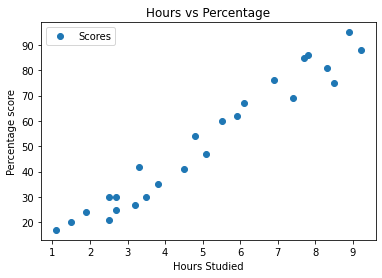

In [7]:
data.plot(x='Hours', y='Scores', style='o')   
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage score')
plt.title('Hours vs Percentage')  
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

 ### #Identifying the outliers in the data

<AxesSubplot:>

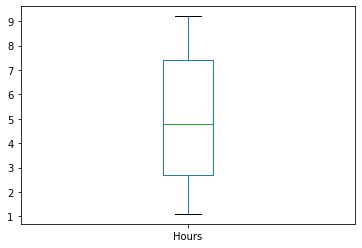

In [8]:
data['Hours'].plot.box()

<AxesSubplot:>

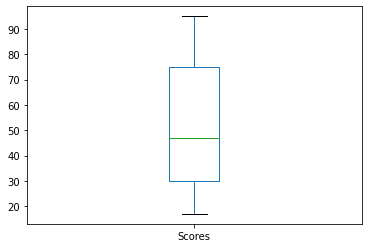

In [9]:
data['Scores'].plot.box()

it seems that there is no outliers in the data

### #Preparing the data

**The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [10]:
x = data.iloc[: , :-1].values
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [11]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### #Training the alogorithm

**We have split our data into training and testing sets, and now is finally the time to train our algorithm.**

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [13]:
regressor.coef_

array([9.91065648])

In [14]:
regressor.intercept_

2.018160041434683

### #Plotting the regression line

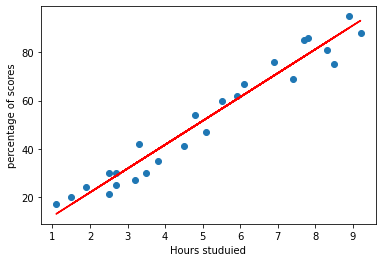

In [15]:
line = regressor.coef_ * x + regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line, color= 'red')
plt.xlabel('Hours studuied')
plt.ylabel('percentage of scores')
plt.show()


### #Making Prediction

In [16]:
y_predicted = regressor.predict(x_test)

### #Comparing Actual vs Predicted

In [17]:
d = pd.DataFrame({'Actual':y_test,
                 'Predicted':y_predicted})
d

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
hours = 9.25
own_pred = regressor.predict([[hours]])

print('The predicted score if person studied for',  hours, 'hours is', own_pred)

The predicted score if person studied for 9.25 hours is [93.69173249]


### #Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test,y_predicted))

mean absolute error: 4.183859899002975
